In [6]:
from IPython.display import Image
import pandas as pd
import numpy as np

data = pd.read_csv('AmesHousing.txt', delimiter="\t")

train = data[0:1460]
test = data[1460:]

In the last project, we learned how the linear regression model estimates the relationship between the feature columns and the target column and how we can use that for making predictions.

In this project, we'll discuss the two most common ways for finding the optimal parameter values for a linear regression model. 
* Each combination of unique parameter values forms a unique linear regression model, and the process of finding these optimal values is known as **model fitting**.

In both approaches to model fitting, we'll aim to minimize the following function:

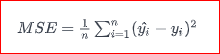

Above function is the **mean squared error** between the predicted labels made using a given model and the true labels. 
* The problem of choosing a set of values that minimize or maximize another function is known as an [optimization problem](https://en.wikipedia.org/wiki/Mathematical_optimization).

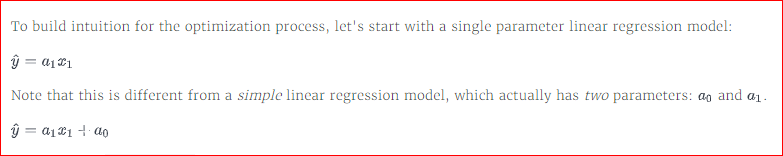

Let's use the `Gr Liv Area` column for the single parameter:

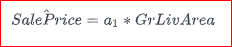

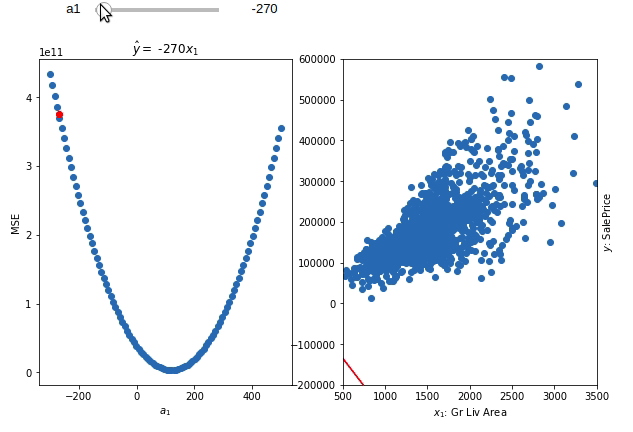

In [2]:
Image("single_var_operation.gif")

In the image above, we observed how the optimization function follows a curve with a minimum value. **This should remind us of our exploration of relative minimum values from calculus**. 

If we recall, we computed the critical points by calculating the curve's derivative, setting it equal to `0`, and finding the **x** value at this point. Unfortunately, this approach won't work when we have multiple parameter values because minimizing one parameter value may increase another parameter's value. 

In addition, while we can plot the **MSE** curve when we only have a single parameter we're trying to find and visually select the value that minimizes the **MSE**, this approach won't work when we have multiple parameter values because we can't visualize past 3 dimensions.

In this project, we'll explore an iterative technique for solving this problem, known as **gradient descent**. The [gradient descent algorithm](https://en.wikipedia.org/wiki/Gradient_descent) works by iteratively trying different parameter values until the model with the **lowest mean squared error** is found. 
* Gradient descent is a commonly used optimization technique for other models as well, like neural networks

Here's an overview of the gradient descent algorithm for a single parameter linear regression model:

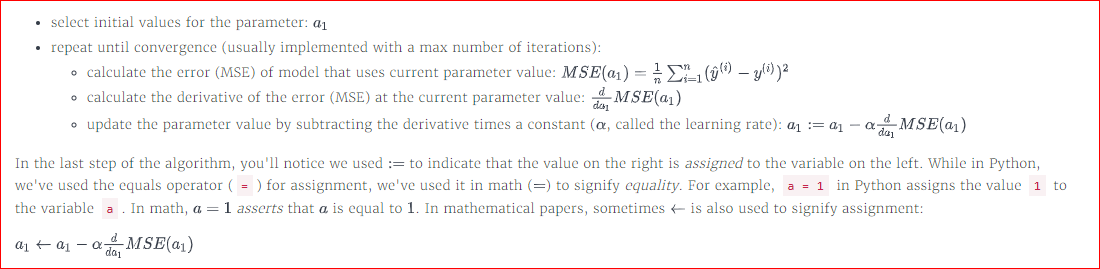

Selecting an appropriate initial parameter and learning rate will reduce the number of iterations required to converge, and is part of hyperparameter optimization.  We won't dive into those techniques in this project and will instead focus on how the algorithm works.

In mathematical optimization, a function that we optimize through minimization is known as a **cost function** or sometimes as the [loss function](https://en.wikipedia.org/wiki/Loss_function).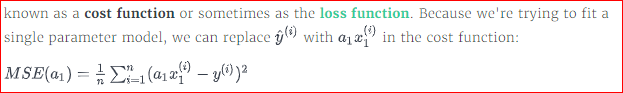

We'll apply calculus properties to simplify this derivative to something we can compute. Note that while we'll probably never have to implement gradient descent ourself (as most packages have high performance implementations), understanding the math will help make it easier for us to debug when we run into issues.

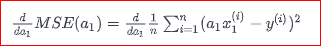

By applying the [linearity of differentiation](https://en.wikipedia.org/wiki/Linearity_of_differentiation) property from calculus, we can bring the derivative term inside the summation:

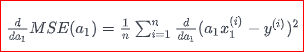

We can apply both the power rule and the chain rule to simplify this. We can read more about the chain rule [here](https://en.wikipedia.org/wiki/Chain_rule) or observe how both are applied together [here](https://www.khanacademy.org/math/calculus-home/taking-derivatives-calc/chain-rule-calc/v/differentiating-powers-of-functions):

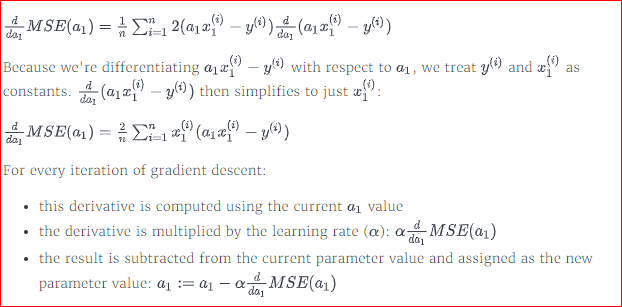

In [3]:
def derivative(a1, xi_list, yi_list):
    error = 0
    for i in range(len(xi_list)):
        error += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len(xi_list)
    return deriv

In [8]:
def gradient_descent(a1_initial,xi_list, yi_list, max_iteration, alpha):
    a1_lst = [a1_initial]
    for i in range(0,max_iteration):
        deriv = derivative(a1_lst[i], xi_list,yi_list)
        a1_new = a1_lst[i] - alpha*deriv
        a1_lst.append(a1_new)
    return a1_lst

In [9]:
param_iterations = gradient_descent(150,train['Gr Liv Area'], train['SalePrice'], 20, .0000003)

In [11]:
final_param = param_iterations[-1]
final_param

120.14219147202738

Now that we've understood how single parameter gradient descent works, let's build some intuition for multi parameter gradient descent. Let's start by visualizing the **MSE** as a function of the parameter values for the following simple linear regression model

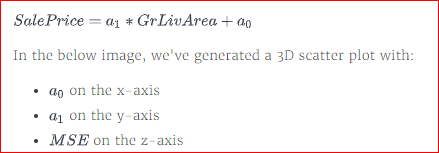

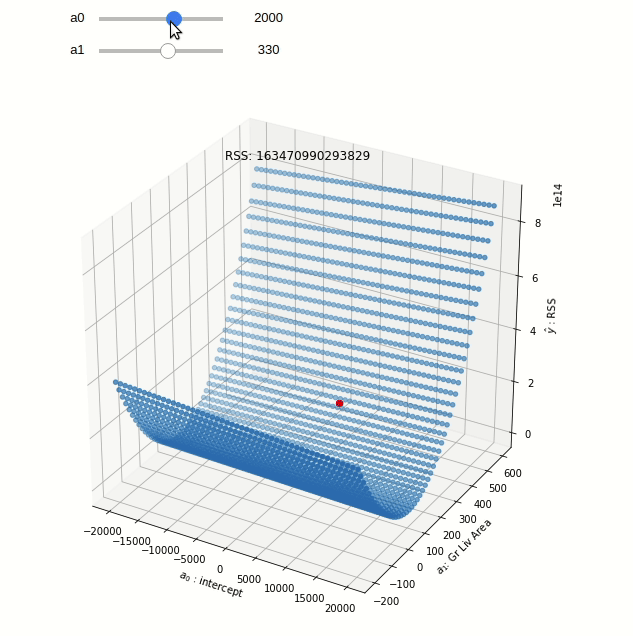

In [12]:
Image("surface_plot.gif")

In the image above, we tried to reduce the **residual sum of squares** (which, by proxy, also reduces the **mean squared error**). The [gradient](https://en.wikipedia.org/wiki/Gradient) is a multi variable generalization of the derivative. 

In the last few cells in this project, we were concerned with minimizing the following cost function

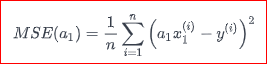

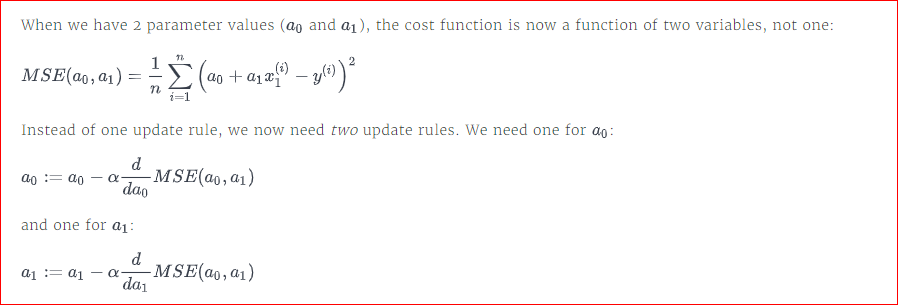

Earlier, we determined that 

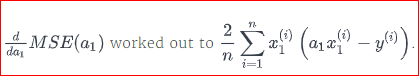

For the multiparameter case, we need to include the additional parameter:

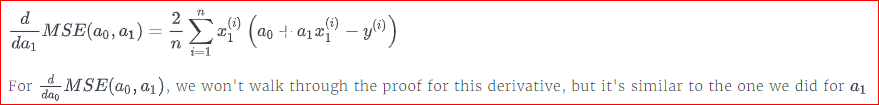

We encourage to derive this with pencil and paper

In [21]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = (2*error)/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

In [1]:
def gradient_descent(a0_initial, a1_initial, xi_list, yi_list, max_iterations, alpha):
    
    a0_lst = [a0_initial]
    a1_lst = [a1_initial]
    
    for i in range(max_iterations):
        a1_deriv = a1_derivative(a0_lst[i], a1_lst[i], xi_list, yi_list)
        a0_deriv = a0_derivative(a0_lst[i], a1_lst[i], xi_list, yi_list)
        
        a1_new = a1_lst[i] - alpha*a1_deriv
        a0_new = a0_lst[i] - alpha*a0_deriv
        
        a0_lst.append(a0_new)
        a1_lst.append(a1_new)
    return (a0_lst, a1_lst)

In [22]:
a0_params, a1_params = gradient_descent(1000,150,train['Gr Liv Area'], train['SalePrice'], 20, .0000003)

In [24]:
print(a0_params)
print()
print(a1_params)

[1000, 999.9729797812329, 999.985903701066, 999.980232547139, 999.9832179015052, 999.9821734177915, 999.983004932363, 999.9829631191217, 999.9833278635107, 999.98350334434, 999.9837669324418, 999.9839895042135, 999.9842311701743, 999.9844639472566, 999.9847008623329, 999.9849358510428, 999.9851717365096, 999.9854072044933, 999.985642866808, 999.9858784386378, 999.986114052572]

[150, 105.34801721547944, 126.13471917628125, 116.45794862200977, 120.96274606972909, 118.86564116059868, 119.84189984026605, 119.38742488614261, 119.59899502291616, 119.50050320781361, 119.54635359313434, 119.52500879150305, 119.53494516153384, 119.53031930255781, 119.53247255390217, 119.53146994657168, 119.53193647656232, 119.53171908350993, 119.53182007507831, 119.53177285001942, 119.53179462379771]


What if we want to use many parameters in our model? Gradient descent actually scales to as many variables as we want. Each parameter value will need its own update rule, and it closely matches the update rule for $a_1$

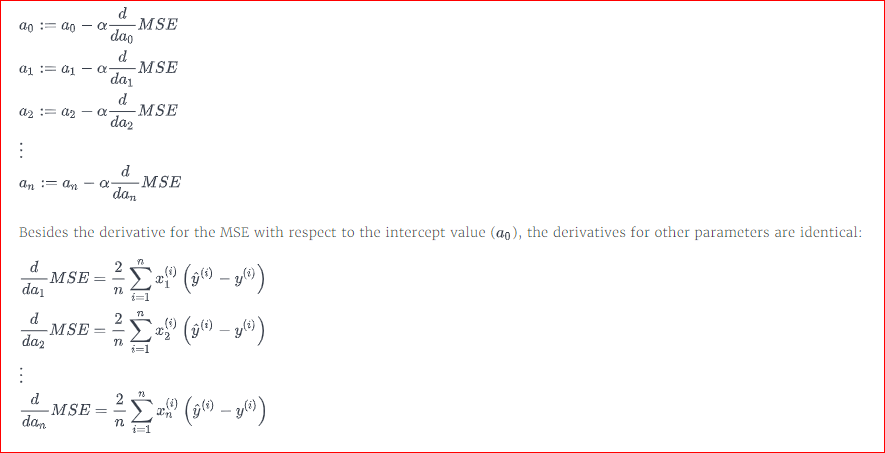

In this project, we explored how to find a linear regression model using the gradient descent algorithm. The main challenges with gradient descent include:

* Choosing good initial parameter values
* Choosing a good learning rate (falls under the domain of hyperparameter optimization)

In the next project, we'll explore a 2nd technique called **OLS (Ordinary Least Squares)** estimation which doesn't require any parameter or hyperparameter value selection.